## Set up
`Rubicon_ml` makes it easy to log plots and images with `artifacts`. In this example we'll walk through creating a plot using `plotly.express` and saving it to an `artifact`.First lets set up our `Rubicon_ml` project.

In [1]:
import os
from rubicon_ml import Rubicon

rubicon = Rubicon(persistence="memory")
project = rubicon.get_or_create_project("Artifact Plots")

Next, create plotting data. This example leverages `plotly` and `plotly.express` for data and plot generation.

In [2]:
import plotly.express as px
from plotly import data

df = data.wind()
df.head()

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4


Using the plotting data generated, create a plot and save it to a file. Utilizing `write_image` we can save our plot to a file. We can use this file to later log with  `Rubicon_ml`. 

In [3]:
scatter_plot=px.scatter(df, x="direction", y="frequency", color="strength")
scatter_plot.write_image("saved-scatter-plot-for-logging.png")

We can also create a plot and covert it to bytes to save it in memory. Using `to_image` we can convert our plot to bytes in-memory. We'll later log the plot from in-memory with `Rubicon-ml`. 

In [4]:
bar_plot=px.bar(df, x="direction", y="frequency", color="strength")
bar_plot_bytes=bar_plot.to_image(format="png")

## Logging your plot
In `Rubicon_ml` , `artifacts` are a catch-all for any other type of data that can be logged to a file. We can use artifacts to capture information that doesn't fall into the `experiment`, `dataframe`, `feature`, and  `parameter` category. 

Leveraging `artifacts`, plots can be logged just by passing its file location in the `data_path` argument to `project.log_artifact()`.

In [5]:
project.log_artifact(data_path="saved-scatter-plot-for-logging.png", description="bar plot logged with path")
artifact_plot_from_file=project.artifacts()[0]
artifact_plot_from_file

We can also log plots by passing its byte representation to the `data_bytes` argument to `project.log_artifact()` as well.

In [6]:
project.log_artifact(name="image", data_bytes=bar_plot_bytes)
artifact_plot_bytes=project.artifacts()[1]
artifact_plot_bytes

## Retrieving your logged plot programmatically 

Since the `PNG` representation of both plots were logged, we can retrieve our artifacted plots programmatically as well. Using `io` and `PIL` library we can convert our plots into an `PNG` image.

In [7]:
import io
from PIL import Image

imageScatterPlotStream = io.BytesIO(artifact_plot_from_file.data)
scatter_plot_image = Image.open(imageScatterPlotStream)
imageBarPlotStream = io.BytesIO(artifact_plot_bytes.data)
bar_plot_image = Image.open(imageBarPlotStream)

Finally, view the two images using `display`.

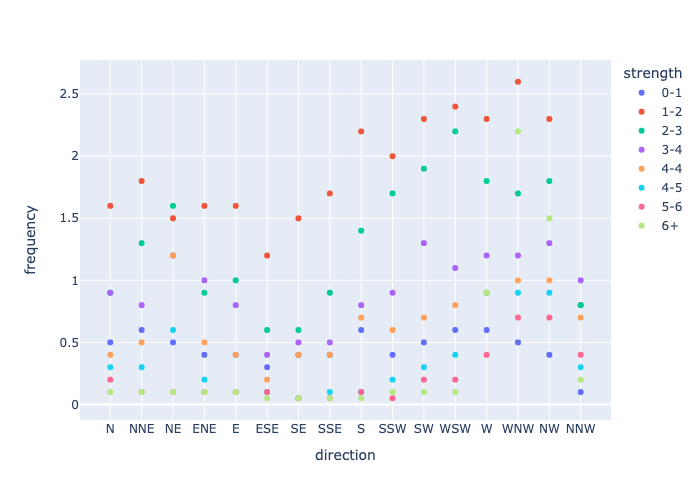

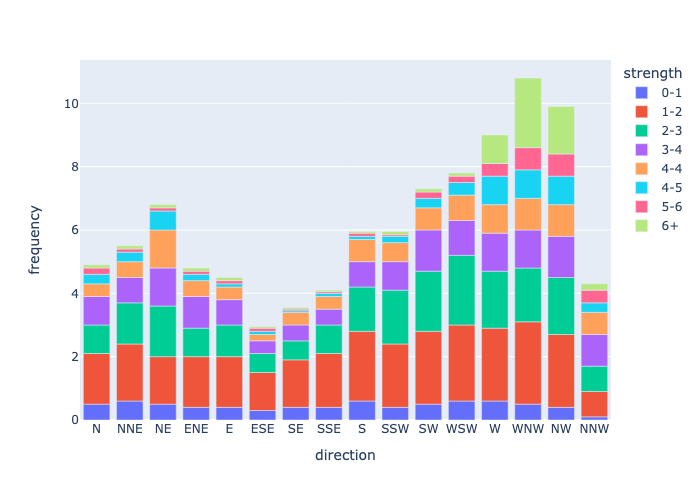

In [8]:
display(scatter_plot_image)
display(bar_plot_image)